# Example Mission Tracks

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

import mission_tools

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [4]:
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'

Number of microSWIFTs: 19


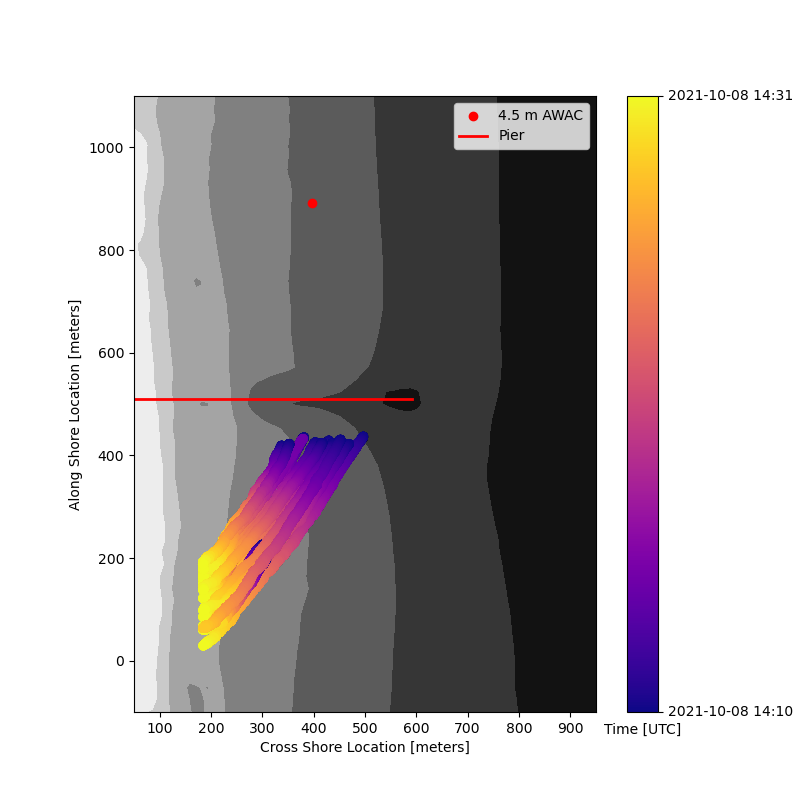

In [19]:
mission_nc_path = '../microSWIFT_data/final_dataset/mission_16.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission_tools.plot_mission_tracks(mission_dataset, bathy_file)
print('Number of microSWIFTs: {}'.format(mission_dataset['trajectory'].size))

Number of microSWIFTs: 13


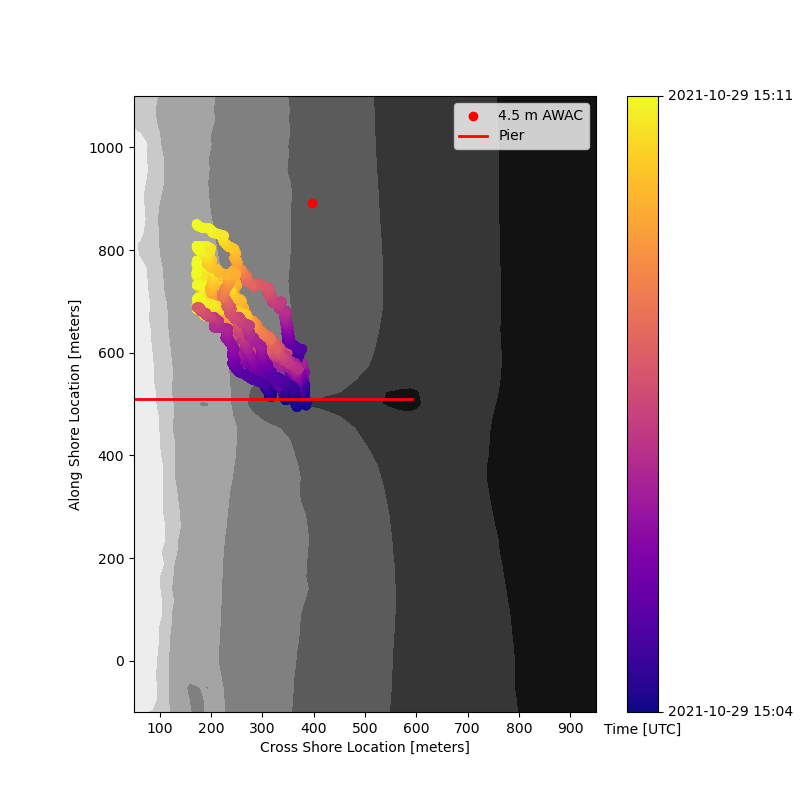

In [20]:
mission_nc_path = '../microSWIFT_data/final_dataset/mission_79.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission_tools.plot_mission_tracks(mission_dataset, bathy_file)
print('Number of microSWIFTs: {}'.format(mission_dataset['trajectory'].size))